<center>
<b>
<font size=5>Assignment3：Regression</font>
<br>
<br>
<font size=4>陈挺  19210240009</font>
<br>
</b>
</center>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-task-description" data-toc-modified-id="Regression-task-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression task description</a></span></li><li><span><a href="#Regression-algorithm" data-toc-modified-id="Regression-algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression algorithm</a></span><ul class="toc-item"><li><span><a href="#L1-&amp;-L2-Normalization" data-toc-modified-id="L1-&amp;-L2-Normalization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>L1 &amp; L2 Normalization</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Implementation</strong></a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ridge regression</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#ElasticNet-regression" data-toc-modified-id="ElasticNet-regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ElasticNet regression</a></span></li></ul></li><li><span><a href="#Implementation-Test" data-toc-modified-id="Implementation-Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementation Test</a></span></li><li><span><a href="#Taks:-Boston-House-Prices" data-toc-modified-id="Taks:-Boston-House-Prices-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Taks: Boston House Prices</a></span><ul class="toc-item"><li><span><a href="#data-pre-analysis" data-toc-modified-id="data-pre-analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>data pre-analysis</a></span></li><li><span><a href="#Model-Test" data-toc-modified-id="Model-Test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><strong>Model Test</strong></a></span></li></ul></li><li><span><a href="#Summarize" data-toc-modified-id="Summarize-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Summarize</strong></a></span></li></ul></div>

# Regression task description

请基于以下数据做房价预测：

（1）https://www.kaggle.com/vikrishnan/boston-house-prices

（2）https://github.com/datasets/house-prices-uk

设计房价预测模型，必选线性回归，包括简单线性回归器（如基于多项式），Ridge 回归器，lasso回归器以及基于决策树的回归器。可选基于支持向量机、深度学习等的回归器。

 
报告至少包含：

任务描述；（2）所选算法描述；（3）算法实现；（4）数据描述、实验结果、总结等信息。 

# Regression algorithm
回归算法有多种，`Ridge regression` 和 `Lasso Regression` 分别对`Linear Regression`进行了改进，在损失函数上分别加上 `L1` 正则项和 `L2` 正则项，`ElasticNet regression`则是在损失函数上综合了 `L1` 正则项和 `L2` 正则项。

它们的损失函数如下：

`Linear Regression`：$Loss = \frac{1}{2m} \sum(y- \hat{y})^{2}$

`Ridge regression`：$Loss = \frac{1}{2m} \sum(y- \hat{y})^{2} + \lambda \sum{\left \| \theta \right \|} $

`Lasso Regression`：$Loss = \frac{1}{2m} \sum(y- \hat{y})^{2} + \lambda \sum{\theta ^{2}}$

`ElasticNet regression`：$Loss = \frac{1}{2m}  \sum(y- \hat{y})^{2} + \lambda_1 \sum{\theta ^{2}} + \lambda_2 \sum{\left \| \theta \right \|}$

其中$\hat{y} = w ^{T}\cdot{x} + b$

## L1 & L2 Normalization
Ridge、Lasso、ElasticNet 回归 几者之间的差别在于损失函数中的正则化项，L1-norm 与 L2-norm 对模型训练过程中所起到的作用如下图所示：
![ ](./pic/L1_and_L2_balls.jpg)
https://upload.wikimedia.org/wikipedia/en/f/fd/L1_and_L2_balls.jpg

# __Implementation__

实现时要注意，Loss中`1/2m`不是正则化项的因子！

## Linear regression

In [1]:
import numpy as np
from pandas import read_csv
from pandas import set_option
set_option('precision', 2)
from matplotlib import pyplot
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
class LinearRegression():
    def __init__(self):
        pass

    def cal_loss(self, w, b, X, y):
        '''
        w: vector (D,)
        b: real num
        X: matrix (N, D)
        y: (N, )
        return: loss value
        '''
        m = X.shape[0]
        D = X.shape[1]

        # loss = np.sum(np.power(X.dot(w)-y, 2))/2/m
        y_hat = X.dot(w) + b
        diff = y_hat - y  # (N,)
        loss = diff.T.dot(diff)  # np.sum(diff^2)
        loss = loss/2/m

        dw = X.T.dot(y_hat - y)/m  # (D,)
        db = np.sum(y_hat - y)/m

        return loss, dw, db

    def train(self, X_train, y_train, learn_rate=0.99, iteration=1000, loss_print=False):
        '''
        X_train: train data (N, D)
        Y_train: train data (N,)

        '''
        D = X_train.shape[1]

        self.W = np.random.randn(D,)*0.001
        self.b = 0

        loss, dw = None, None
        for i in range(iteration):
            loss, dw, db = self.cal_loss(self.W, self.b, X_train, y_train)
            self.W = self.W - learn_rate*dw
            self.b = self.b - learn_rate*db

            if loss_print:
                print('Iteration: %d , loss = %.2f' % (i, loss))
        pass

    def predict(self, X_test):
        return X_test.dot(self.W) + self.b  # (N, D) dot (D, )

    pass

## Ridge regression

In [3]:
# 继承 LinearRegression 改写其中的 Loss 计算的方式
class RidgeRegression(LinearRegression):

    def __init__(self, lamda):
        self.lamda = lamda  # lamda是一个超参数
        super().__init__()
        pass

    def cal_loss(self, w, b, X, y):
        '''
        w: vector (D,)
        b: real num
        X: matrix (N, D)
        y: (N, )
        return: loss value
        '''
        l = self.lamda
        m = X.shape[0]

        loss = np.sum(np.power(X.dot(w)-y, 2))
        loss = loss/2/m + l*np.sum(np.abs(w))

        dw = X.T.dot(X.dot(w)+b - y)  # (D,)
        dw = dw/m + l*(len(w)-len(w[w < 0]))

        db = np.sum(X.dot(w)+b - y)/m

        return loss, dw, db
    pass

## Lasso regression

In [4]:
class LassoRegression(LinearRegression):

    def __init__(self, lamda):
        self.lamda = lamda  # lamda是一个超参数
        super().__init__()
        pass

    def cal_loss(self, w, b, X, y):
        '''
        w: vector (D,)
        b: real num
        X: matrix (N, D)
        y: (N, )
        return: loss value
        '''
        l = self.lamda
        m = X.shape[0]

        loss = np.sum(np.power(X.dot(w)-y, 2))
        loss = loss/2/m + l*np.sum(np.power(w, 2))

        dw = X.T.dot(X.dot(w)+b - y)  # (D,)
        dw = dw/m + 2*l*w

        db = np.sum(X.dot(w)+b - y)/m
        return loss, dw, db

    pass

## ElasticNet regression

In [5]:
class ElasticRegression(LinearRegression):

    def __init__(self, lamda_1, lamda_2):
        self.lamda_1 = lamda_1  # lamda是一个超参数
        self.lamda_2 = lamda_2
        super().__init__()
        pass

    def cal_loss(self, w, b, X, y):
        '''
        w: vector (D,)
        b: real num
        X: matrix (N, D)
        y: (N, )
        return: loss value
        '''
        l1 = self.lamda_1
        l2 = self.lamda_2
        m = X.shape[0]

        loss = np.sum(np.power(X.dot(w)-y, 2))
        loss = loss/2/m + l1*np.sum(np.power(w, 2)) + l2*np.sum(np.abs(w))

        dw = X.T.dot(X.dot(w)+b - y)  # (D,)
        dw = dw/m + 2*l1*w + l2*(len(w)-len(w[w < 0]))

        db = np.sum(X.dot(w)+b - y)/m
        return loss, dw, db
    pass

# Implementation Test
测试implementation部分所实现的回归模型是否正确


模型测试：使用sklearn中的diabetes数据进行测试，为了可视化的方便，只选择了一个feature作为输入x。

对代码的实现进行测试分为两部分：
- Loss是否下降（检测梯度下降算法是否正确实现）
- 迭代次数增加模型的表现能力

In [6]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-42]
diabetes_X_test = diabetes_X[-42:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-42]
diabetes_y_test = diabetes.target[-42:]
print("数据size:", "训练集", diabetes_X_train.shape, diabetes_y_train.shape,
      "测试集", diabetes_X_test.shape, diabetes_y_test.shape)

数据size: 训练集 (400, 1) (400,) 测试集 (42, 1) (42,)


In [7]:
dev_model = LinearRegression()
dev_model.train(diabetes_X_train, diabetes_y_train, learn_rate=0.5, iteration=10, loss_print=True)

Iteration: 0 , loss = 14624.89
Iteration: 1 , loss = 5892.55
Iteration: 2 , loss = 3707.83
Iteration: 3 , loss = 3160.01
Iteration: 4 , loss = 3021.42
Iteration: 5 , loss = 2985.15
Iteration: 6 , loss = 2974.45
Iteration: 7 , loss = 2970.15
Iteration: 8 , loss = 2967.46
Iteration: 9 , loss = 2965.17


将不同迭代次数下，模型的拟合效果展示出来，观察在训练集上不同迭代次数下拟合的 y = a*x + b 在测试集合的表示能力。可以看出随着迭代的增多，模型的表示能力逐渐变强。

In [8]:
model_1 = LinearRegression()
model_1.train(diabetes_X_train, diabetes_y_train, learn_rate=0.99, iteration=0, loss_print=False)

model_1_1 = LinearRegression()
model_1_1.train(diabetes_X_train, diabetes_y_train, learn_rate=0.99, iteration=10, loss_print=False)

model_1_2 = LinearRegression()
model_1_2.train(diabetes_X_train, diabetes_y_train, learn_rate=0.99, iteration=100, loss_print=False)

model_1_3 = LinearRegression()
model_1_3.train(diabetes_X_train, diabetes_y_train, learn_rate=0.99, iteration=1000, loss_print=False)

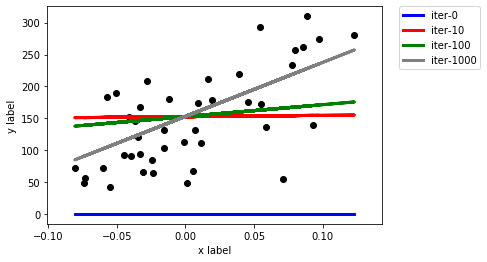

In [9]:
plt.xlabel('x label')
plt.ylabel('y label')

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black');
plt.plot(diabetes_X_test, model_1.predict(diabetes_X_test), color='blue',
         linewidth=3, label="iter-0");
plt.plot(diabetes_X_test, model_1_1.predict(diabetes_X_test), color='red',
         linewidth=3, label="iter-10");
plt.plot(diabetes_X_test, model_1_2.predict(diabetes_X_test), color='green',
         linewidth=3, label="iter-100");
plt.plot(diabetes_X_test, model_1_3.predict(diabetes_X_test), color='grey',
         linewidth=3, label="iter-1000");
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.show()

# Taks: Boston House Prices
https://www.kaggle.com/vikrishnan/boston-house-prices

## data pre-analysis

数据的预分析借鉴自 [Manimala](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression/notebook)。

In [10]:
path = './data/housing.csv'
attri = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(path, names=attri, delim_whitespace=True)
# print(data.dtypes)
dataset.head(20)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


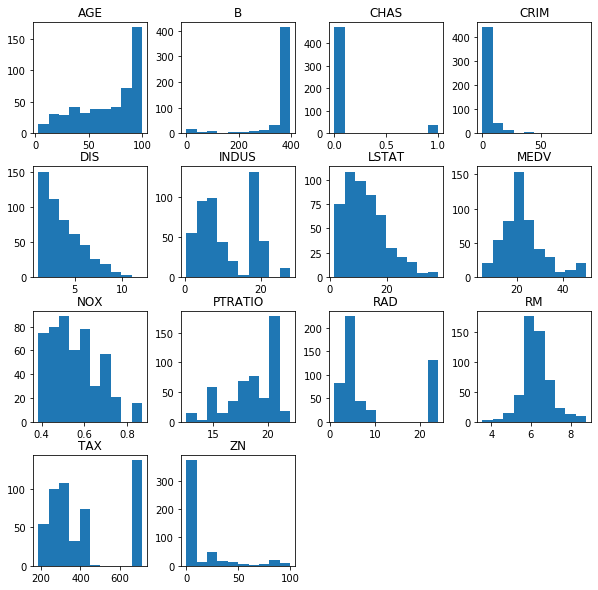

In [11]:
# histograms
dataset.hist(bins=10,figsize=(10,10),grid=False);

通过 feature selection 选定了'RM'、'LSTAT'、 'PTRATIO'、 和 'MEDV' 作为关键特征

In [12]:
prices = dataset['MEDV']
dataset = dataset.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


## __Model Test__

Data load:

[Manimala](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression/notebook)通过 feature selection 选定了'RM'、'LSTAT'、 'PTRATIO'、 和 'MEDV' 作为关键特征

In [13]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:, 0:6]
Y = array[:, 6]
validation_size = 0.20
seed = 7
train_X,  test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

print("数据size:", "训练集", train_X.shape, train_Y.shape,
      "测试集", test_X.shape, test_Y.shape)

数据size: 训练集 (404, 6) (404,) 测试集 (102, 6) (102,)


__data normalization：数据归一化/标准化是十分重要的环节！__

我自己在实现Linear Regression的时候，没有对数据进行归一化，导致 __模型不收敛（Loss没有递减）!!!__

归一化/标准化时需要注意的问题：
- 在 __特征方向__ 上进行归一化
- 训练集和测试集 __分开__ 进行归一化
- __对label不用做归一化呀！__

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_X = std.fit_transform(train_X)
test_X = std.fit_transform(test_X)

score function: 使用均方误差最为模型评分

In [15]:
def mean_squared_error(y, y_hat):
    m = len(y)
    return np.sum(np.power(y-y_hat, 2))/m 

Model comparison: 比对所实现的几个不同的分类模型的表现

In [16]:
model__1, model__2, model__3, model__4 = LinearRegression(), RidgeRegression(
    0.1), LassoRegression(0.5), ElasticRegression(0.5, 0.5)

model__1.train(train_X, train_Y, learn_rate=0.001, iteration=50000, loss_print=False)
model__2.train(train_X, train_Y, learn_rate=0.1, iteration=1000, loss_print=False)
model__3.train(train_X, train_Y, learn_rate=0.1, iteration=1000, loss_print=False)
model__4.train(train_X, train_Y, learn_rate=0.1, iteration=1000, loss_print=False)

In [17]:
print("mean squared error on different regression model：")
print("Linear：%.2f"%(mean_squared_error(y=test_Y, y_hat=model__1.predict(test_X))))
print("Ridge：%.2f"%(mean_squared_error(y=test_Y, y_hat=model__2.predict(test_X))))
print("Lasso：%.2f"%(mean_squared_error(y=test_Y, y_hat=model__3.predict(test_X))))
print("ElasticNet：%.2f"%(mean_squared_error(y=test_Y, y_hat=model__4.predict(test_X))))

mean squared error on different regression model：
Linear：40.34
Ridge：36.94
Lasso：39.22
ElasticNet：38.09


# __Summarize__

通过不同模型之间的比对，可以看出在相同 学习率、迭代次数 `Ridge Regression`、`Lasso Regression`、`ElasticNet Regression`的表现要稍微优于不添加正则项的`Linear Regression`，这还是在手动设定正则化项系数`λ1`和`λ2`（如果交叉验证进行超参数选择，相信在测试集上会有更好的表现，篇幅原因就没有实验）。

通过自己实现不同的线性模型，增加了自己对于模型的理解、提升了代码水平。